In [1]:
arr = [1,2,3,42,34,1,123,34,45,65,2,4,5,2,43,1,2] #-[7,8,9] 
len(arr)

17

In [2]:
p1, p2  = 0 ,0 
arr.append(-1)
mxSum = 0
currSum = 0
for i in range(len(arr)-1):
    currSum+=arr[i]
    if(arr[i] > arr[i+1]): 
        if(mxSum < currSum):
            p1 = p2 
            p2 = i 
            mxSum = currSum
        currSum=0
    
ans = [i for i in range(p1+1 , p2+1)]
ans

[7, 8, 9]

In [1]:
import sys
base = r"C:\Users\vaibh\Documents\MY_MODELS\CNN_MNIST_digits-98.91"
sys.path.append(base)
from model_class import two
import os
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy
import cv2
import pickle

In [2]:
os.listdir(base)

['Mnist_digits_cnn.pkl', 'model.pkl', 'model_class.py', '__pycache__']

In [3]:
model_path = os.listdir(base)[0]
#model_path
model = two()
model


two(
  (b1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=(2, 2), stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (b2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (Classify): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=10, bias=True)
  )
)

In [4]:
model = pickle.load(open(os.path.join(base , model_path) , "rb"))

In [5]:
cap = cv2.VideoCapture(0)
ret , frame = cap.read()
ret

True

(-0.5, 639.5, 479.5, -0.5)

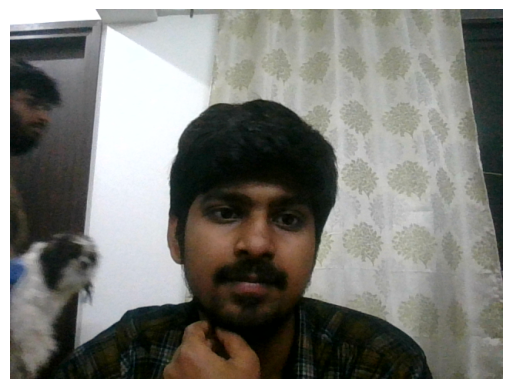

In [6]:
ret , frame = cap.read()
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))
plt.axis(False)

In [7]:
y ,x = 240 , 320

In [8]:
base = r"digits"
dig_paths = [os.path.join(base,i) for i in os.listdir(base)]
digits = [(cv2.imread(i)) for i in dig_paths]

In [9]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret , frame = cap.read()
    frame = (cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)[y-100:y+100,x-100:x+100])
    cv2.imshow( "webcam", frame)    
    X =  cv2.resize(frame, (28,28))
    cv2.imshow("resized " ,X)

    cv2.imshow("Answer",digits[torch.softmax(model.pred((torch.tensor([[X]])).type(torch.float)).squeeze(), dim = 0).argmax().item()])
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()   
cv2.destroyAllWindows()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_2328\1595349132.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  cv2.imshow("Answer",digits[torch.softmax(model.pred((torch.tensor([[X]])).type(torch.float)).squeeze(), dim = 0).argmax().item()])


In [23]:
torch.softmax(model.pred((torch.tensor([[X]])).type(torch.float)).squeeze(), dim = 0).argmax().item()#.argmax(dim=1).item()

5

(-0.5, 483.5, 458.5, -0.5)

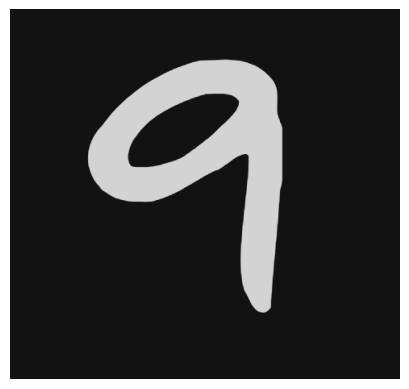

In [29]:
plt.imshow(digits[9])
plt.axis(False)

In [ ]:
pl